<a href="https://colab.research.google.com/github/Xarisviero/datastories_for_emme/blob/main/%CE%A4%CE%95%CE%9B%CE%99%CE%9A%CE%97_%CE%95%CE%A1%CE%93%CE%91%CE%A3%CE%99%CE%91_%CE%91%CE%9D%CE%91%CE%9B%CE%A5%CE%A3%CE%97_%CE%94%CE%95%CE%94%CE%9F%CE%9C%CE%95%CE%9D%CE%A9%CE%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Δημιουργία emolex για sentiment analysis**

In [ ]:
!python -m spacy download el_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 30.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('el_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from datetime import datetime
import spacy

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
filepath = "https://raw.githubusercontent.com/datajour-gr/DataJournalism/main/Bachelor%20Lessons%202023/Lesson%2010/NRC_GREEK_Translated_6_2020.csv"
emolex_df = pd.read_csv(filepath)
emolex_df = emolex_df.drop_duplicates(subset=['word']).dropna().reset_index(drop=True)

In [ ]:
emolex_df = pd.read_csv(filepath)
emolex_df.head(3)

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
0,αφεση,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ενορκη βεβαιωση,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,εχοντας,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Φτιάξε ένα df με positive words
positive_words_df = emolex_df[emolex_df.Positive == 1][['word']]
# Μετονόμασε τη στήλη "word" σε "positive_words"
positive_words_df = positive_words_df.rename(columns={"word":"positive_words"}).reset_index(drop=True)

# Φτιάξε ένα df με negative words
negative_words_df = emolex_df[emolex_df.Negative == 1][['word']]
# Μετονόμασε τη στήλη "word" σε "negative_words"
negative_words_df = negative_words_df.rename(columns={"word":"negative_words"}).reset_index(drop=True)

**Εισαγωγή της βιβλιοθήκης spacy για να έχουμε δυνατότητες nlp**

In [ ]:
import spacy

In [ ]:
nlp = spacy.load('el_core_news_sm')

In [ ]:
skai_df=pd.read_csv("/content/gdrive/MyDrive/skai_politiki_01-05-2024_15-06-2024.csv")
efsyn_df = pd.read_csv("/content/gdrive/MyDrive/efsyn_politiki_01-05-2024_15-06-2024.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Στην συνέχεια θα διαβάσουμε τα άρθρα**

In [ ]:
skai_df.head(1)

,url,title,full-text,author,website,datetime,section
0,https://www.skai.gr/news/politics/sounak-xrist...,Η Γάζα στο επίκεντρο της τηλεφωνικής επικοινων...,Η Γάζα στο επίκεντρο της τηλεφωνικής επικοινων...,skai.gr,skai.gr,2024-05-01,Πολιτική


In [ ]:
efsyn_df.head(1)

,url,title,full-text,author,website,datetime,section
0,https://www.efsyn.gr/politiki/antipoliteysi/43...,Επιστολή Χαρίτση σε Μητσοτάκη: Συναντηθείτε με...,Επιστολή Χαρίτση σε Μητσοτάκη: Συναντηθείτε με...,efsyn.gr,efsyn.gr,2024-05-02,Πολιτική


In [ ]:
len(skai_df)

722

In [ ]:
len(efsyn_df)

700

In [ ]:
# Καθαρισμός δεδομένων
skai_df.dropna(inplace=True)
skai_df = skai_df.reset_index(drop=True)

efsyn_df.dropna(inplace=True)
efsyn_df = efsyn_df.reset_index(drop=True)

**Σορτάρουμε τα columns σε date και text**




In [ ]:
short_skai_df=skai_df[['datetime', 'full-text']]
short_skai_df.head()

,datetime,full-text
0,2024-05-01,Η Γάζα στο επίκεντρο της τηλεφωνικής επικοινων...
1,2024-05-01,Μητσοτάκης: Οι αποφάσεις για το Μάτι δεν είναι...
2,2024-05-01,ΣΥΡΙΖΑ: Αίτημα για κλήση της Ν. Κεραμέως στη Β...
3,2024-05-01,Στη Βαρβάκειο ο πρωθυπουργός – Το αγκάθι της α...
4,2024-05-01,Debate ζητεί η αντιπολίτευση από την κυβέρνηση...


In [ ]:
short_efsyn_df = efsyn_df[['datetime','full-text']]
short_efsyn_df.head()

,datetime,full-text
0,2024-05-02,Επιστολή Χαρίτση σε Μητσοτάκη: Συναντηθείτε με...
1,2024-05-02,Η ακτινογραφία της Αριστεράς της Μεταπολίτευση...
2,2024-05-02,Σε κίνδυνο η ακαδημαϊκή ελευθερία σε ΗΠΑ και Ε...
3,2024-05-02,Φροντιστήριο σε βουλευτές εν όψει ευρωκάλπης ...
4,2024-05-02,Όλη η πρόταση νόμου του ΣΥΡΙΖΑ για την ακρίβει...


In [ ]:
short_skai_df['datetime'] = pd.to_datetime(short_skai_df['datetime'])

<ipython-input-57-d3e0ff2aaa54>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short_skai_df['datetime'] = pd.to_datetime(short_skai_df['datetime'])


**Φιλτράρισμα των δεδομένων μεταξύ των ημερομηνιών 15 Μαΐου 2024 και 10 Ιουνίου 2024**

In [ ]:
short_skai_df['datetime']

,datetime
0,2024-05-01
1,2024-05-01
2,2024-05-01
3,2024-05-01
4,2024-05-01
...,...
717,2024-06-15
718,2024-06-15
719,2024-06-15
720,2024-06-15


In [ ]:
skai_df1=short_skai_df.loc[100:648]
skai_df1

,datetime,full-text
100,2024-05-11,Αλβανικά ΜΜΕ: Ο Ράμα φέρνει πούλμαν για να γεμ...
101,2024-05-11,Ανδρουλάκης από Ηράκλειο Κρήτης: Στόχος του ΠΑ...
102,2024-05-11,ΕΕ: Πώς αλλάζει το σύστημα ασύλου; Μη κυβερνητ...
103,2024-05-11,Αυγενάκης: Οι πολίτες συνειδητοποιούν ότι πρέπ...
104,2024-05-11,Εισαγγελία του Αρείου Πάγου: Δεν αφέθηκε ελεύθ...
...,...,...
644,2024-06-09,Ψήφισε η Ζωή Κωνσταντοπούλου: Πάμε να κάνουμε ...
645,2024-06-09,Ευρωεκλογές 2024: Άνοιξαν οι κάλπες - Πού και ...
646,2024-06-09,Στην Κηφισιά ψήφισε ο Κυριάκος Μητσοτάκης Στο ...
647,2024-06-09,Ψήφισε ο Στέφανος Κασσελάκης στέλνοντας μήνυμα...


In [ ]:
len(skai_df1)

549

In [ ]:
short_efsyn_df['datetime']

,datetime
0,2024-05-02
1,2024-05-02
2,2024-05-02
3,2024-05-02
4,2024-05-02
...,...
695,2024-06-15
696,2024-06-15
697,2024-06-15
698,2024-06-15


In [ ]:
efsyn_df1=short_efsyn_df.loc[99:646]
efsyn_df1

,datetime,full-text
99,2024-05-11,«Θα» για τα έργα που καρκινοβατούν στη Χίο Υπ...
100,2024-05-11,«Θα πάει στη δικαιοσύνη ο υπουργός που αγνόησε...
101,2024-05-11,Από την Κέρκυρα ξεκίνησε η προεκλογική καμπάνι...
102,2024-05-11,Ζητά από το VMRO να αλλάξει... μετεκλογικά θέσ...
103,2024-05-11,Μια σπουδαία «κομεντιέν» με αντισυμβατικό παρε...
...,...,...
642,2024-06-09,«Δεν πρόκειται να προδώσω ποτέ την εμπιστοσύνη...
643,2024-06-09,Οι περιφέρειες με τις υψηλότερες επιδόσεις κομ...
644,2024-06-09,"Η Ελλάδα στις κάλπες: Στιγμιότυπα, παράδοξα κα..."
645,2024-06-09,Τελική εκτίμηση του ΥΠΕΣ: Απώλειες για κυβέρνη...


In [ ]:
len(efsyn_df1)

548

**Φτιάχνουμε έναν vectorizer από τις λέξεις του συναισθηματικού λεξικού**

In [ ]:
emolex_df['word'].head(5)

,word
0,αφεση
1,ενορκη βεβαιωση
2,εχοντας
3,εχω
4,οριο


In [ ]:
vec = CountVectorizer(analyzer = 'word', vocabulary = emolex_df.word,
                      lowercase=False,
                      strip_accents = 'unicode',
                      stop_words= list(nlp.Defaults.stop_words),
                      ngram_range=(1, 2))

**Φτιάχνουμε λίστες με τις λέξεις για θετικότητα/αρνητικότητα και για κάθε συναίσθημα**

In [ ]:
emolex_df[emolex_df["Positive"]== 1].tail()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
13119,ζωτικης σημασιας,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13142,αδιαβροχος,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13147,καλωσορισατε,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
13155,απροσδοκητα ευρημα,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13168,νεοτερος,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#positive words
positive_words = emolex_df[emolex_df.Positive == 1]['word']
# negative words
negative_words = emolex_df[emolex_df.Negative == 1]['word']

In [ ]:
# Φιλτράρουμε τις λίστες των λέξεων ώστε να περιλαμβάνουν μόνο αυτές που υπάρχουν στο wordcount_df
positive_words_filtered = [word for word in positive_words if word in wordcount_df.columns]
negative_words_filtered = [word for word in negative_words if word in wordcount_df.columns]

**Υπολογισμός των συναισθημάτων για κάθε άρθρο χρησιμοποιώντας τις φιλτραρισμένες λίστες**

In [ ]:
skai_df1['positive'] = wordcount_df[positive_words_filtered].sum(axis=1)
skai_df1['negative'] = wordcount_df[negative_words_filtered].sum(axis=1)

efsyn_df1['positive'] = wordcount_df[positive_words_filtered].sum(axis=1)
efsyn_df1['negative'] = wordcount_df[negative_words_filtered].sum(axis=1)

<ipython-input-69-7d0a55693af6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skai_df1['positive'] = wordcount_df[positive_words_filtered].sum(axis=1)
<ipython-input-69-7d0a55693af6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skai_df1['negative'] = wordcount_df[negative_words_filtered].sum(axis=1)
<ipython-input-69-7d0a55693af6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

**Επαναφορά των index και ορισμός datetime ως index**

In [ ]:
skai_df1['datetime'] = pd.to_datetime(skai_df1['datetime'])
skai_df1.set_index('datetime', inplace=True)

efsyn_df1['datetime'] = pd.to_datetime(efsyn_df1['datetime'])
efsyn_df1.set_index('datetime', inplace=True)

<ipython-input-70-fc9dc01caa60>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skai_df1['datetime'] = pd.to_datetime(skai_df1['datetime'])
<ipython-input-70-fc9dc01caa60>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  efsyn_df1['datetime'] = pd.to_datetime(efsyn_df1['datetime'])


In [ ]:
skai_df1

,full-text,positive,negative,trust,angry
datetime,,,,,
2024-05-11,Αλβανικά ΜΜΕ: Ο Ράμα φέρνει πούλμαν για να γεμ...,6,0,0,0
2024-05-11,Ανδρουλάκης από Ηράκλειο Κρήτης: Στόχος του ΠΑ...,23,3,0,3
2024-05-11,ΕΕ: Πώς αλλάζει το σύστημα ασύλου; Μη κυβερνητ...,24,1,0,1
2024-05-11,Αυγενάκης: Οι πολίτες συνειδητοποιούν ότι πρέπ...,16,0,2,0
2024-05-11,Εισαγγελία του Αρείου Πάγου: Δεν αφέθηκε ελεύθ...,9,1,0,1
...,...,...,...,...,...
2024-06-09,Ψήφισε η Ζωή Κωνσταντοπούλου: Πάμε να κάνουμε ...,10,0,0,0
2024-06-09,Ευρωεκλογές 2024: Άνοιξαν οι κάλπες - Πού και ...,22,0,0,0
2024-06-09,Στην Κηφισιά ψήφισε ο Κυριάκος Μητσοτάκης Στο ...,7,0,0,0


In [ ]:
efsyn_df1

,full-text,positive,negative,trust,angry
datetime,,,,,
2024-05-11,«Θα» για τα έργα που καρκινοβατούν στη Χίο Υπ...,5,1,1,1
2024-05-11,«Θα πάει στη δικαιοσύνη ο υπουργός που αγνόησε...,6,0,0,0
2024-05-11,Από την Κέρκυρα ξεκίνησε η προεκλογική καμπάνι...,23,3,0,3
2024-05-11,Ζητά από το VMRO να αλλάξει... μετεκλογικά θέσ...,24,1,0,1
2024-05-11,Μια σπουδαία «κομεντιέν» με αντισυμβατικό παρε...,16,0,2,0
...,...,...,...,...,...
2024-06-09,«Δεν πρόκειται να προδώσω ποτέ την εμπιστοσύνη...,4,0,0,0
2024-06-09,Οι περιφέρειες με τις υψηλότερες επιδόσεις κομ...,3,0,0,0
2024-06-09,"Η Ελλάδα στις κάλπες: Στιγμιότυπα, παράδοξα κα...",10,0,0,0


In [ ]:
skai_df1.reset_index(inplace=True)
skai_df1.set_index('datetime', inplace=True)
skai_df1

,full-text,positive,negative,trust,angry
datetime,,,,,
2024-05-11,Αλβανικά ΜΜΕ: Ο Ράμα φέρνει πούλμαν για να γεμ...,6,0,0,0
2024-05-11,Ανδρουλάκης από Ηράκλειο Κρήτης: Στόχος του ΠΑ...,23,3,0,3
2024-05-11,ΕΕ: Πώς αλλάζει το σύστημα ασύλου; Μη κυβερνητ...,24,1,0,1
2024-05-11,Αυγενάκης: Οι πολίτες συνειδητοποιούν ότι πρέπ...,16,0,2,0
2024-05-11,Εισαγγελία του Αρείου Πάγου: Δεν αφέθηκε ελεύθ...,9,1,0,1
...,...,...,...,...,...
2024-06-09,Ψήφισε η Ζωή Κωνσταντοπούλου: Πάμε να κάνουμε ...,10,0,0,0
2024-06-09,Ευρωεκλογές 2024: Άνοιξαν οι κάλπες - Πού και ...,22,0,0,0
2024-06-09,Στην Κηφισιά ψήφισε ο Κυριάκος Μητσοτάκης Στο ...,7,0,0,0


In [ ]:
#plt.style.use('classic')
#plt.style.use('ggplot')
#plt.style.use('Solarize_Light2')
#plt.style.use('seaborn-v0_8-bright')

**Διαγράμματα άρθρων SKAI και EFSYN**

In [ ]:
plt.style.use('Solarize_Light2')

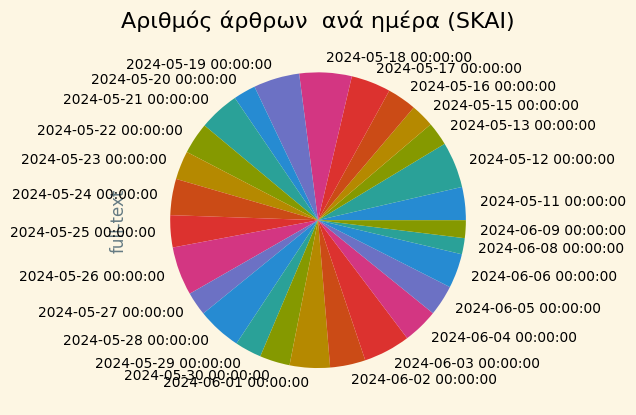

In [ ]:
skai_df1['full-text'].str.len().resample('D').mean().dropna().plot(kind="pie", title="Αριθμός άρθρων  ανά ημέρα (SKAI)")
plt.show()

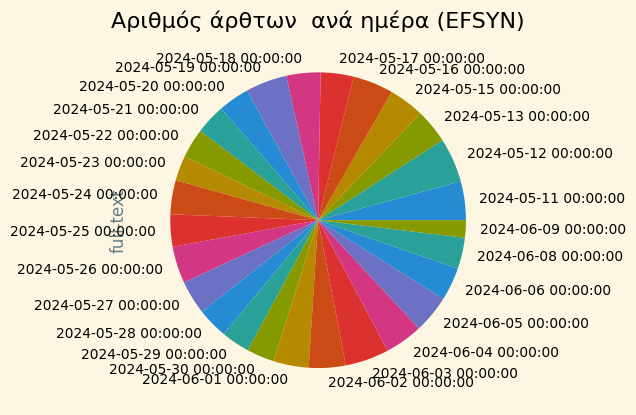

In [ ]:
efsyn_df1['full-text'].str.len().resample('D').mean().dropna().plot(kind="pie", title="Αριθμός άρθτων  ανά ημέρα (EFSYN)")
plt.show()

**Διαγράμματα SKAI**

<Axes: ylabel='datetime'>

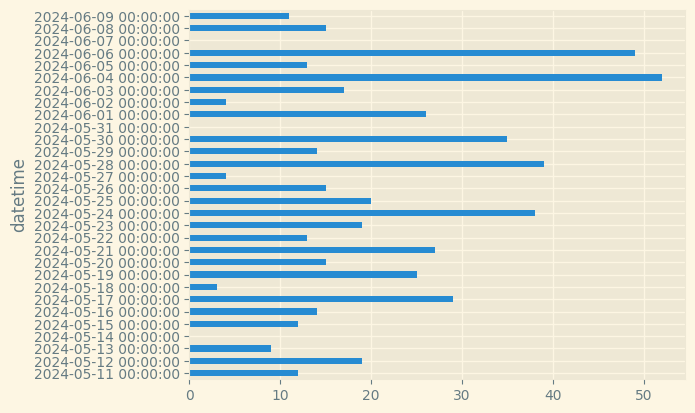

In [ ]:
skai_df1['full-text'].resample('D').count().plot(kind='barh')

Text(0.5, 1.0, 'Θετικότητα (SKAI)')

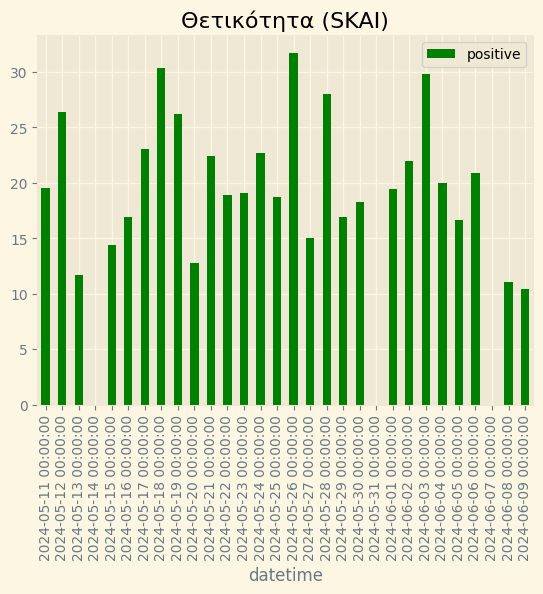

In [ ]:
skai_df1['positive'].resample('D').mean().plot(kind='bar', color='green', legend=True)
plt.title("Θετικότητα (SKAI)")

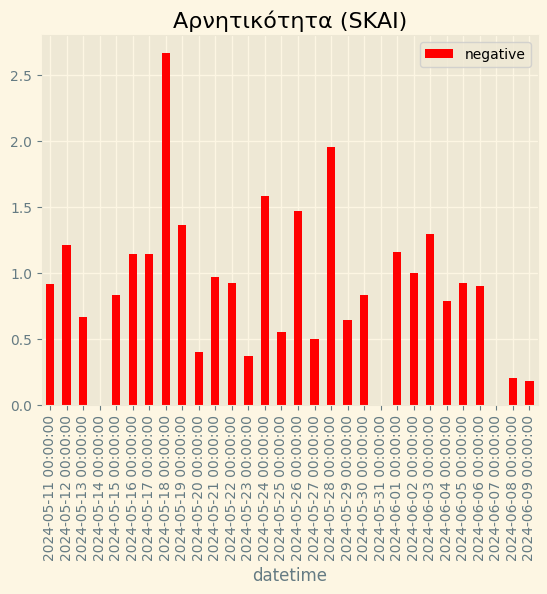

In [ ]:
skai_df1['negative'].resample('D').mean().plot(kind='bar', color='r', legend=True, title="Αρνητικότητα (SKAI)")
plt.show()

<Axes: xlabel='datetime'>

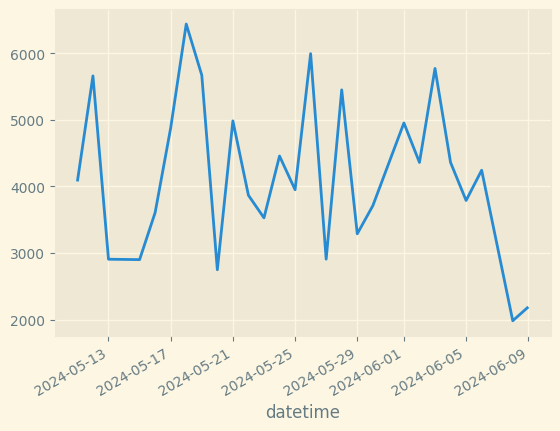

In [ ]:
skai_df1['full-text'].str.len().resample('D').mean().dropna().plot()

**Τα διαγράμματα για το Efsyn**

In [ ]:
plt.style.use('Solarize_Light2')

<Axes: ylabel='datetime'>

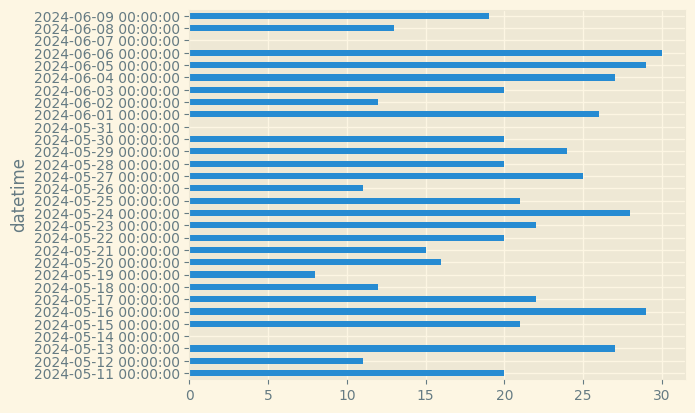

In [ ]:
efsyn_df1['full-text'].resample('D').count().plot(kind='barh')

<Axes: xlabel='datetime'>

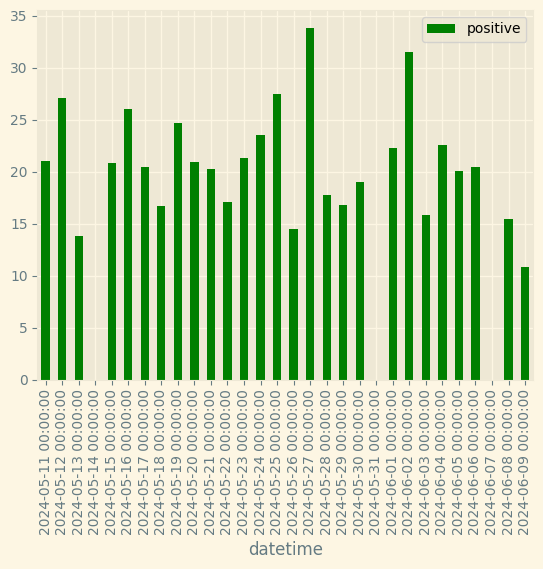

In [ ]:
efsyn_df1['positive'].resample('D').mean().plot(kind='bar',color='green', legend=True)

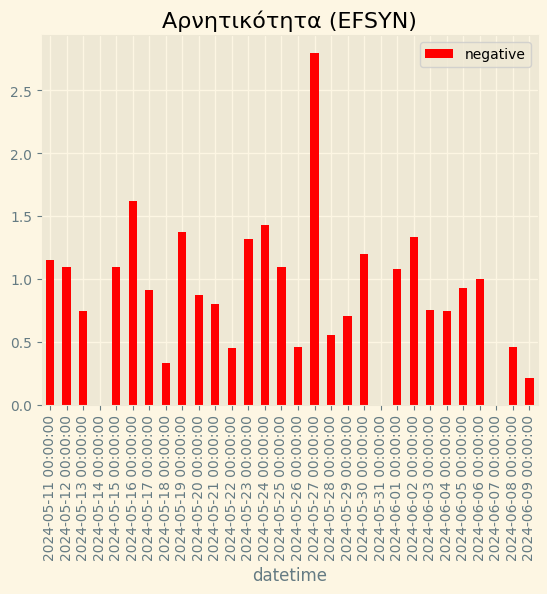

In [ ]:
efsyn_df1['negative'].resample('D').mean().plot(kind='bar', color='r', legend=True, title="Αρνητικότητα (EFSYN)")
plt.show()

<Axes: xlabel='datetime'>

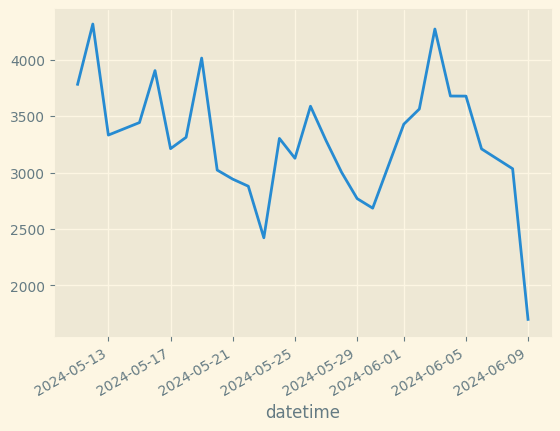

In [ ]:
efsyn_df1['full-text'].str.len().resample('D').mean().dropna().plot()

Wordcloud για SKAI και EFSYN

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [ ]:
import spacy

nlp = spacy.load('el_core_news_sm')

# Λίστα με τις πρώτες 20 stop words του μοντέλου
stop_words = list(nlp.Defaults.stop_words)[0:20]
print(stop_words)

['πλάι', 'τέτοιον', 'δήθεν', 'καθόλου', 'ανωτέρω', 'μέλει', 'προς', 'οποίο', 'ετέραι', 'ετούτην', 'αλλοιώτικα', 'όλης', 'ποιού', 'νωρίς', 'τίποτα', 'τόσην', 'προχτές', 'πάνω', 'κάτι', 'όσην']


 **Εισαγωγή των απαραίτητων βιβλιοθηκών**

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

**Συνένωση όλων των κειμένων σε ένα string**

In [ ]:
text = " ".join(article for article in skai_df['full-text'])

 **  Δημιουργία του wordcloud για SKAI & EFSYN**

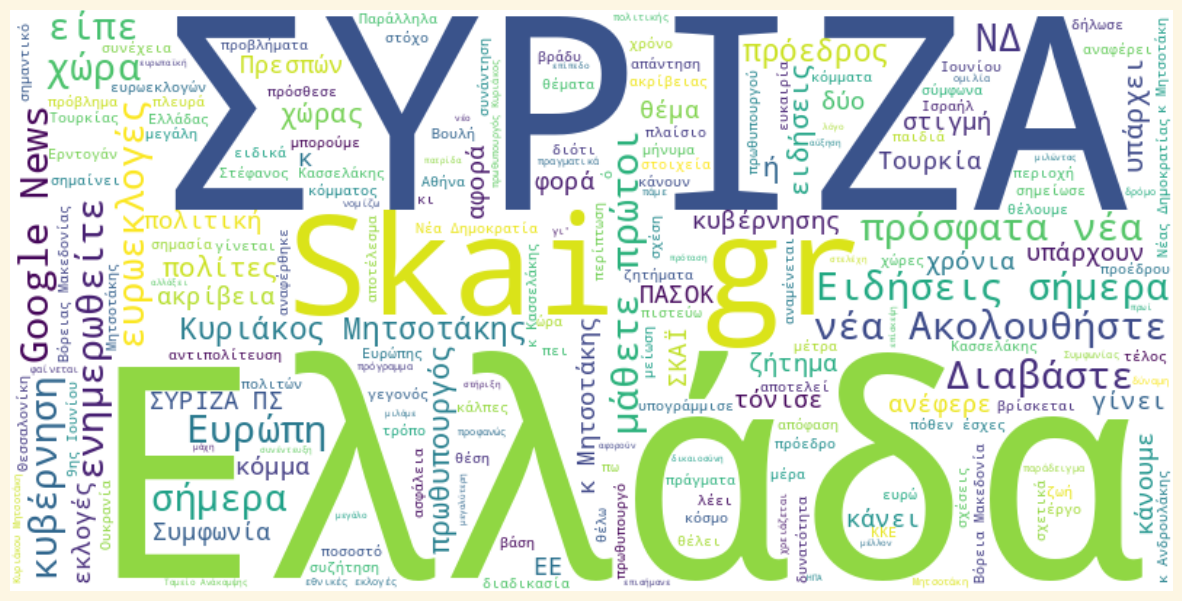

In [ ]:
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=nlp.Defaults.stop_words).generate(text)

plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

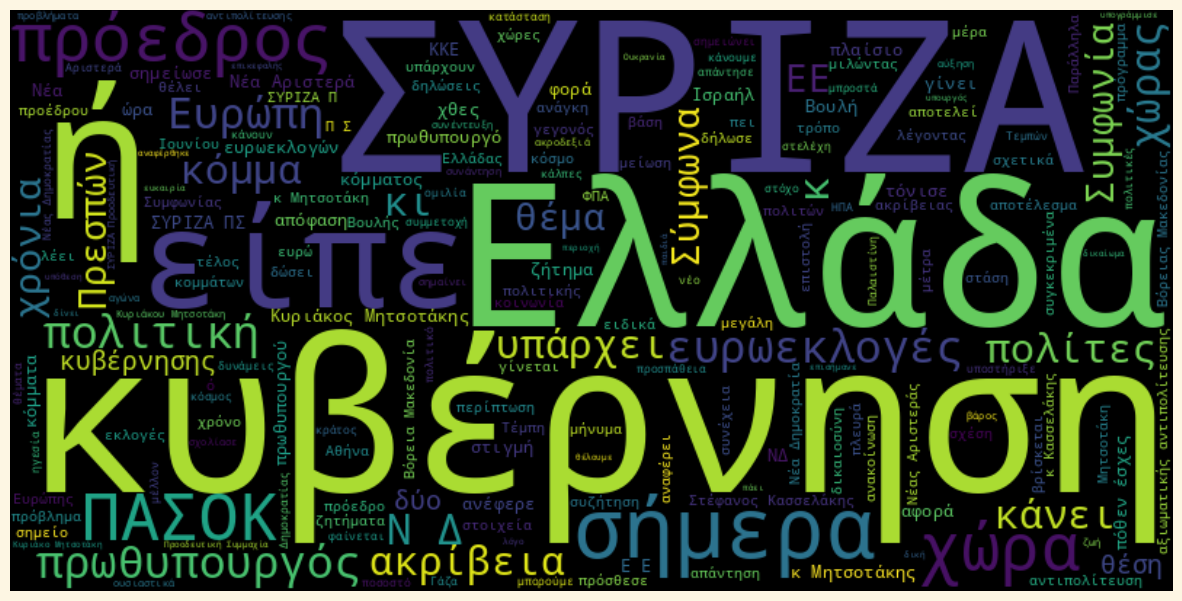

In [ ]:
text_efsyn = " ".join(article for article in efsyn_df['full-text'])

wordcloud_efsyn = WordCloud(width=800, height=400, background_color='black', stopwords=nlp.Defaults.stop_words).generate(text_efsyn)

# Οπτικοποίηση του wordcloud για το Efsyn
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud_efsyn, interpolation='bilinear')
plt.axis('off')  # Αφαίρεση των αξόνων
plt.show()

**Βαθμός ομοιότητας ανάμεσα σε SKAI και EFSYN**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns

** Συνένωση κειμένων από το SKAI και το Efsyn**

cosine scores ==>  [[1.         0.81226374]
 [0.81226374 1.        ]]


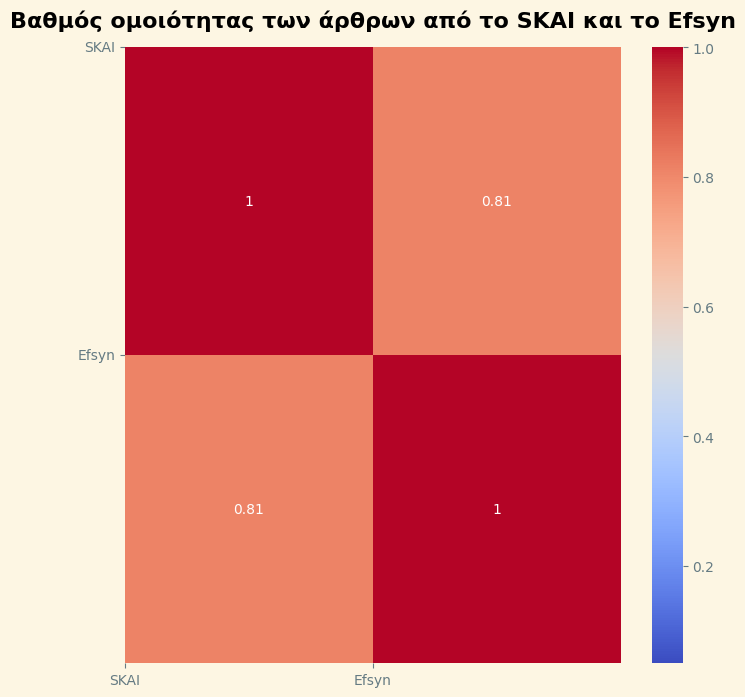

In [ ]:
#Συνένωση κειμένων από το SKAI και το Efsyn
skai_text = skai_df['full-text'].str.cat(sep=' ')
efsyn_text = efsyn_df['full-text'].str.cat(sep=' ')

#Δημιουργία ενός DataFrame με τα κείμενα των δύο sites
two_sites_list = []
skaiD = {'site': 'SKAI', 'text': skai_text}
efsynD = {'site': 'Efsyn', 'text': efsyn_text}
two_sites_list.append(skaiD)
two_sites_list.append(efsynD)

two_sites_df = pd.DataFrame(two_sites_list)

#Χρήση του TfidfVectorizer για τη δημιουργία των vectors των κειμένων
tfidf_vectorizer = TfidfVectorizer(stop_words=list(nlp.Defaults.stop_words), max_features=500)
tfidf_matrix = tfidf_vectorizer.fit_transform(two_sites_df['text'])

#Υπολογισμός της ομοιότητας με cosine similarity
arr = cosine_similarity(tfidf_matrix, tfidf_matrix)
print("cosine scores ==> ", arr)

#Δημιουργία heatmap
plt.figure(figsize=(8, 8))
plt.title('Βαθμός ομοιότητας των άρθρων από το SKAI και το Efsyn', y=1.02, fontweight='bold')
sns.heatmap(data=arr, annot=True, vmin=0.05, vmax=1.0, cmap="coolwarm", cbar=True)  # Χρησιμοποιούμε το 'arr'
plt.xticks([0, 1], ['SKAI', 'Efsyn'])
plt.yticks([0, 1], ['SKAI', 'Efsyn'], rotation=0)
plt.show()

**Διανυσματοποίηση Εγγράφων/κειμένων (Vectorization) και Βαθμός ομοιότητας στα πρώτα 10 άρθρα των μέσων SKAI & EFSYN**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer


tfidf_vectorizer = TfidfVectorizer(stop_words= list(nlp.Defaults.stop_words), max_features=500)
tfidf_matrix_train = tfidf_vectorizer.fit_transform(short_efsyn_df['full-text'])


results = pd.DataFrame(tfidf_matrix_train.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
results.head()

,00,000,10,11,12,13,14,15,17,18,...,χώρα,χώρας,χώρες,χώρο,χώρου,ψήφο,ψήφος,ψήφου,όνομα,ώρα
0,0.0,0.0,0.000000,0.000000,0.086434,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.152627,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.0,0.0,0.000000,0.000000,0.000000,0.084409,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.0,0.0,0.118498,0.124249,0.000000,0.000000,0.0,0.0,0.0,0.068887,...,0.000000,0.042691,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.044993


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

print("cosine scores ==> ",cosine_similarity(tfidf_matrix_train[0:1], tfidf_matrix_train))

cosine scores ==>  [[1.         0.10902117 0.07520862 0.08164968 0.05927734 0.03740297
  0.05832189 0.0371739  0.10374518 0.08169333 0.01306032 0.04368934
  0.05949598 0.17794951 0.10000147 0.02942543 0.21066858 0.06527395
  0.06398201 0.03287333 0.01182378 0.05671799 0.         0.15162446
  0.11171479 0.03326209 0.07330227 0.1047597  0.02344419 0.05496614
  0.06271153 0.05003829 0.17558393 0.06995176 0.04363225 0.02083692
  0.         0.         0.06980251 0.10230166 0.08150722 0.03213948
  0.01391704 0.00816721 0.13000695 0.08858955 0.06984517 0.03539947
  0.03149722 0.01408825 0.05660404 0.05208401 0.18321452 0.11920505
  0.07828796 0.06613867 0.0272507  0.05971279 0.05660404 0.06613867
  0.09642562 0.06448854 0.02919662 0.10399034 0.10884559 0.05879382
  0.14109379 0.02681823 0.0912133  0.05724047 0.05921845 0.06711453
  0.02956877 0.03379342 0.08740399 0.0821527  0.06501873 0.00630494
  0.10909319 0.0521893  0.08760446 0.01896722 0.05565988 0.02853401
  0.05886593 0.07345357 0.062

In [ ]:
#Επιλογή των πρώτων 10 άρθρων του SKAI και της Efsyn
skai_top10 = skai_df1['full-text'].head(10)
efsyn_top10 = efsyn_df1['full-text'].head(10)

In [ ]:
tfidf_vectorizer = TfidfVectorizer(stop_words=list(nlp.Defaults.stop_words), max_features=500)
tfidf_matrix_skai = tfidf_vectorizer.fit_transform(skai_top10)
tfidf_matrix_efsyn = tfidf_vectorizer.fit_transform(efsyn_top10)

**Υπολογισμός της cosine similarity για Efsyn και SKAI**

In [ ]:
arr_skai = cosine_similarity(tfidf_matrix_skai, tfidf_matrix_skai)
arr_efsyn = cosine_similarity(tfidf_matrix_efsyn, tfidf_matrix_efsyn)

<Axes: title={'center': 'Βαθμός ομοιότητας των πρώτων 10 άρθρων του SKAI'}>

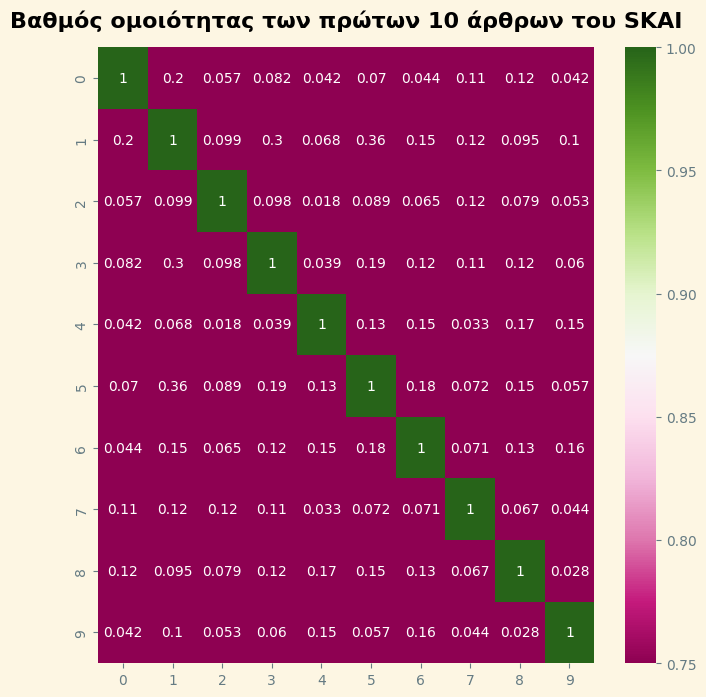

In [ ]:
plt.figure(figsize=(8, 8))
plt.title('Βαθμός ομοιότητας των πρώτων 10 άρθρων του SKAI', y=1.02, fontweight='bold')
sns.heatmap(data=arr_skai, annot=True, vmin=0.70, vmax=1.0, cmap="PiYG")

<Axes: title={'center': 'Βαθμός ομοιότητας των πρώτων 10 άρθρων της Efsyn'}>

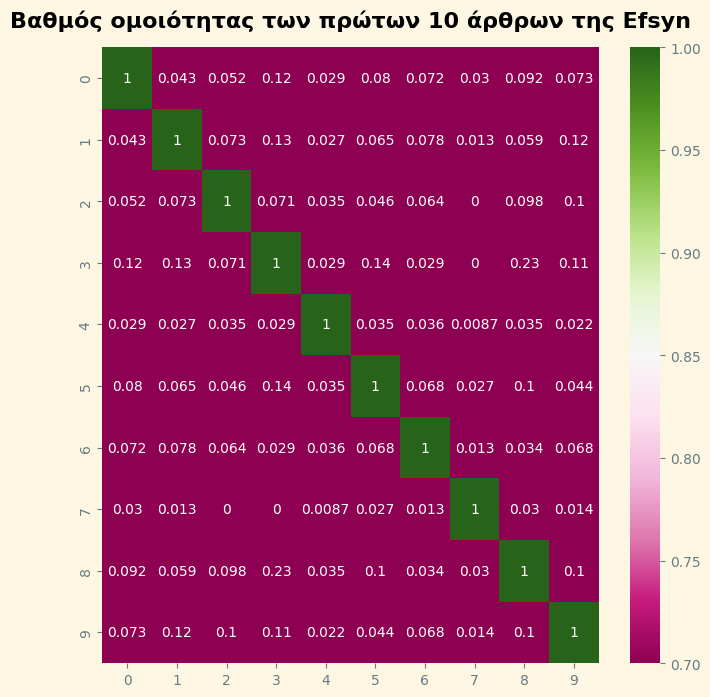

In [ ]:
plt.figure(figsize=(8, 8))
plt.title('Βαθμός ομοιότητας των πρώτων 10 άρθρων της Efsyn', y=1.02, fontweight='bold')
sns.heatmap(data=arr_efsyn, annot=True, vmin=0.70, vmax=1.0, cmap="PiYG")